<a href="https://colab.research.google.com/github/plaban1981/Auto-Sklearn/blob/master/AutoSklearn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!apt-get install swig -y
!pip install Cython numpy
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 1s (1,128 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 145674 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpac

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys,os,urllib


## Import data 

https://github.com/srivatsan88/YouTubeLI

In [0]:
BASE_DIR = '/tmp'
OUTPUT_FILE = os.path.join(BASE_DIR, 'churn_data.csv')

In [0]:
churn = urllib.request.urlretrieve('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv', OUTPUT_FILE)

In [10]:
churn_df = pd.read_csv('/tmp/churn_data.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
churn_df.shape

(7043, 21)

## Summarry Statistics

In [11]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [12]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
churn_df.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,0221-WMXNQ,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


##Check for Null Values

In [15]:
churn_df.isnull().sum()[churn_df.isnull().sum() > 0]

Series([], dtype: int64)

In [16]:
churn_df.iloc[:, 19].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

## Change datatype of TotalCharges to numeric

In [0]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'],errors ='coerce')

In [22]:
churn_df['TotalCharges'].dtype

dtype('float64')

## Replace special characters if any

In [0]:
churn_df = churn_df.replace(r'^\s*$', np.nan, regex=True)

## Label Encoding

In [0]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

categorical_columns = [ col for col in churn_df.columns if churn_df[col].dtype == 'object']

In [0]:
column_transform = make_column_transformer((OrdinalEncoder(),categorical_columns))
churn_transformed = column_transform.fit_transform(churn_df)

In [30]:
churn_transformed[1:5,]

array([[3.962e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00],
       [2.564e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 1.000e+00],
       [5.535e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.511e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]])

In [32]:
churn_df_transformed = pd.DataFrame(churn_transformed,columns= categorical_columns).astype('int')
churn_df_transformed.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,5375,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,3962,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,2564,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,5535,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,6511,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


## Combining Preprocessed Data

In [0]:
churn_df.update(churn_df_transformed)

In [36]:
churn_df.shape

(7043, 21)

In [37]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [38]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [0]:
transformed_churn_df = churn_df.drop('customerID',axis=1)

In [43]:
for col in transformed_churn_df.columns:
  transformed_churn_df[col] = pd.to_numeric(transformed_churn_df[col],errors='coerce')
transformed_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


##Selecting Independent Features and Dependent Feature

In [0]:
X = transformed_churn_df.drop('Churn',axis=1)
Y = transformed_churn_df['Churn']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

##Automl Classification

In [0]:
from autosklearn import classification as Classifier

In [0]:
automl = Classifier.AutoSklearnClassifier(time_left_for_this_task=180, per_run_time_limit=40, n_jobs=2,exclude_estimators=None, include_preprocessors=["no_preprocessing", ], exclude_preprocessors=None)

In [56]:
automl.fit(X_train, y_train)

[WARNING] [2020-01-10 08:41:31,334:EnsembleBuilder(1791095845):ac49726ef89084ad9505db5505c5b8e0] No models better than random - using Dummy Score!
[WARNING] [2020-01-10 08:41:31,359:EnsembleBuilder(1791095845):ac49726ef89084ad9505db5505c5b8e0] No models better than random - using Dummy Score!
[WARNING] [2020-01-10 08:41:33,380:EnsembleBuilder(1791095845):ac49726ef89084ad9505db5505c5b8e0] No models better than random - using Dummy Score!


AutoSklearnClassifier(delete_output_folder_after_terminate=False,
                      delete_tmp_folder_after_terminate=False,
                      disable_evaluator_output=False,
                      ensemble_memory_limit=1024, ensemble_nbest=50,
                      ensemble_size=50, exclude_estimators=None,
                      exclude_preprocessors=None, get_smac_object_callback=None,
                      include_estimators=None,
                      include_preprocessors=['no_preprocessing'],
                      initial_configurations_via_metalearning=25,
                      logging_config=None, metadata_directory=None,
                      ml_memory_limit=3072, n_jobs=2, output_folder=None,
                      per_run_time_limit=40, resampling_strategy='holdout',
                      resampling_strategy_arguments=None, seed=1,
                      shared_mode=False, smac_scenario_args=None,
                      time_left_for_this_task=180, tmp_folder=None)

In [57]:
print(automl.show_models())

[(0.400000, SimpleClassificationPipeline({'balancing:strategy': 'none', 'categorical_encoding:__choice__': 'no_encoding', 'classifier:__choice__': 'adaboost', 'imputation:strategy': 'mean', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'none', 'classifier:adaboost:algorithm': 'SAMME', 'classifier:adaboost:learning_rate': 0.7386839465414408, 'classifier:adaboost:max_depth': 6, 'classifier:adaboost:n_estimators': 468},
dataset_properties={
  'task': 1,
  'sparse': False,
  'multilabel': False,
  'multiclass': False,
  'target_type': 'classification',
  'signed': False})),
(0.140000, SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'categorical_encoding:__choice__': 'one_hot_encoding', 'classifier:__choice__': 'adaboost', 'imputation:strategy': 'most_frequent', 'preprocessor:__choice__': 'no_preprocessing', 'rescaling:__choice__': 'none', 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True', 'classifier:adaboost:algorithm': 'SAMME',

In [58]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: ac49726ef89084ad9505db5505c5b8e0
  Metric: accuracy
  Best validation score: 0.810729
  Number of target algorithm runs: 59
  Number of successful target algorithm runs: 55
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 3
  Number of target algorithms that exceeded the memory limit: 0



In [60]:
print(automl.cv_results_['mean_test_score'])

[0.79453441 0.         0.78340081 0.79048583 0.70394737 0.
 0.75607287 0.77378543 0.         0.78795547 0.76973684 0.80819838
 0.         0.69989879 0.72874494 0.74797571 0.65080972 0.76518219
 0.80870445 0.72419028 0.78188259 0.79149798 0.7312753  0.79048583
 0.75910931 0.7312753  0.76771255 0.78390688 0.76619433 0.73076923
 0.77277328 0.79908907 0.80516194 0.75708502 0.7312753  0.80161943
 0.74342105 0.73785425 0.79048583 0.76417004 0.70546559 0.81072874
 0.8097166  0.80617409 0.80870445 0.7312753  0.73684211 0.80617409
 0.75253036 0.80617409 0.81072874 0.74949393 0.77935223 0.80617409
 0.74898785 0.79605263 0.7667004  0.80617409 0.70698381]


In [68]:
automl.cv_results_['params']

[{'balancing:strategy': 'none',
  'categorical_encoding:__choice__': 'one_hot_encoding',
  'categorical_encoding:one_hot_encoding:minimum_fraction': 0.01,
  'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'True',
  'classifier:__choice__': 'random_forest',
  'classifier:random_forest:bootstrap': 'True',
  'classifier:random_forest:criterion': 'gini',
  'classifier:random_forest:max_depth': 'None',
  'classifier:random_forest:max_features': 0.5,
  'classifier:random_forest:max_leaf_nodes': 'None',
  'classifier:random_forest:min_impurity_decrease': 0.0,
  'classifier:random_forest:min_samples_leaf': 1,
  'classifier:random_forest:min_samples_split': 2,
  'classifier:random_forest:min_weight_fraction_leaf': 0.0,
  'classifier:random_forest:n_estimators': 100,
  'imputation:strategy': 'mean',
  'preprocessor:__choice__': 'no_preprocessing',
  'rescaling:__choice__': 'standardize'},
 {'balancing:strategy': 'weighting',
  'categorical_encoding:__choice__': 'one_hot_encoding',


In [69]:
print('Classifiers used')
print('*'*80)
for result in automl.cv_results_['params']:
  print(result['classifier:__choice__'])
  

Classifiers used
********************************************************************************
random_forest
gradient_boosting
libsvm_svc
gradient_boosting
decision_tree
gradient_boosting
gaussian_nb
adaboost
libsvm_svc
random_forest
random_forest
gradient_boosting
extra_trees
decision_tree
k_nearest_neighbors
gaussian_nb
multinomial_nb
qda
gradient_boosting
decision_tree
k_nearest_neighbors
gradient_boosting
multinomial_nb
random_forest
adaboost
qda
sgd
qda
gradient_boosting
bernoulli_nb
gradient_boosting
random_forest
lda
bernoulli_nb
lda
random_forest
random_forest
passive_aggressive
k_nearest_neighbors
extra_trees
sgd
liblinear_svc
lda
lda
passive_aggressive
lda
multinomial_nb
lda
liblinear_svc
lda
liblinear_svc
qda
liblinear_svc
lda
qda
random_forest
gradient_boosting
lda
adaboost


In [70]:
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]

{'balancing:strategy': 'none',
 'categorical_encoding:__choice__': 'one_hot_encoding',
 'categorical_encoding:one_hot_encoding:use_minimum_fraction': 'False',
 'classifier:__choice__': 'liblinear_svc',
 'classifier:liblinear_svc:C': 2.1653556659389426,
 'classifier:liblinear_svc:dual': 'False',
 'classifier:liblinear_svc:fit_intercept': 'True',
 'classifier:liblinear_svc:intercept_scaling': 1,
 'classifier:liblinear_svc:loss': 'squared_hinge',
 'classifier:liblinear_svc:multi_class': 'ovr',
 'classifier:liblinear_svc:penalty': 'l2',
 'classifier:liblinear_svc:tol': 0.06600077686730348,
 'imputation:strategy': 'median',
 'preprocessor:__choice__': 'no_preprocessing',
 'rescaling:__choice__': 'minmax'}

In [0]:
predictions = automl.predict(X_test)

In [72]:
from  sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy score", accuracy_score(y_test, predictions))

Accuracy score 0.8088930936613056


In [73]:
print(confusion_matrix(y_test,predictions))

[[699  99]
 [103 156]]


In [0]:
cf  = confusion_matrix(y_test,predictions)

## Visualizing Confusion Matrix

Text(33.0, 0.5, 'Actual Output')

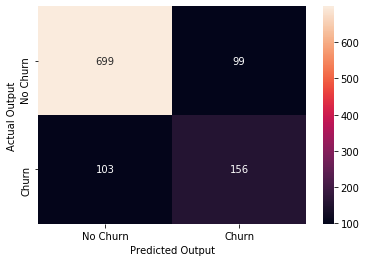

In [75]:
sns.heatmap(cf,annot=True,fmt='g',xticklabels=['No Churn','Churn'],yticklabels=['No Churn','Churn'])
plt.xlabel('Predicted Output')
plt.ylabel('Actual Output')

##Saving Automl model

In [0]:
import pickle
x = automl.show_models()
results = {"ensemble": x}
pickle.dump(results, open('churn.pickle','wb'))

In [77]:
!ls *.pickle

churn.pickle


In [78]:
np.bincount(predictions)

array([802, 255])

In [79]:
np.bincount(y_test)

array([798, 259])

## Precision - Of all the users that the algorithm predicts will churn, how many of them do actually churn?

In [80]:
from sklearn.metrics import precision_score,recall_score

print(precision_score(y_test,predictions))

0.611764705882353


##Recall - What percentage of users that end up churning does the algorithm successfully find?

In [81]:
print(recall_score(y_test,predictions))

0.6023166023166023
